# 2. 머신러닝 맛보기1: 분류문제

2.1 분석 데이터 검토

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/breast-cancer-wisconsin.csv', encoding='utf-8')
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [4]:
data.describe()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [5]:
data['Class'].value_counts(sort=False)

0    444
1    239
Name: Class, dtype: int64

In [6]:
print(data.shape)

(683, 11)


2.2 특성(x)과 레이블(y) 나누기

In [7]:
X = data[['Clump_Thickness', 'Cell_Size', 'Cell_Shape', 
          'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 
          'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 
          'Mitoses']]
X1 = data[data.columns[1:10]]
X2 = data.loc[:, 'Clump_Thickness':'Mitoses']
print(X.shape)
print(X1.shape)
print(X2.shape)

(683, 9)
(683, 9)
(683, 9)


In [8]:
y = data[["Class"]]
print(y.shape)

(683, 1)


2.3 train-test 데이터셋 나누기

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

print(y_train.shape)
print(y_test.shape)
print()

print(y_train.mean())
print(y_test.mean())

(512, 1)
(171, 1)

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


2.4 정규화

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

가. train data의 정규화

In [11]:
# minmax
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

# standard
scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

In [12]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,6.938894e-18,6.938894e-18,-2.775558e-17,-2.775558e-17,-4.857226e-17,6.938894e-18,-2.081668e-17,-2.775558e-17,-1.734723e-18
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.174173e+00,-6.936309e-01,-7.319088e-01,-6.423777e-01,-9.959361e-01,-7.060427e-01,-1.016165e+00,-6.008881e-01,-3.548677e-01
25%,-8.242452e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-5.969255e-01,-6.008881e-01,-3.548677e-01
50%,-1.243886e-01,-6.936309e-01,-7.319088e-01,-6.423777e-01,-5.373756e-01,-7.060427e-01,-1.776856e-01,-6.008881e-01,-3.548677e-01
75%,5.754680e-01,3.860715e-01,6.076347e-01,4.017410e-01,3.797454e-01,7.360871e-01,6.607941e-01,7.011454e-02,-3.548677e-01
max,1.975181e+00,2.296314e+00,2.282064e+00,2.489978e+00,3.131108e+00,1.766180e+00,2.756993e+00,2.418624e+00,4.903108e+00


2. test data의 정규화

In [14]:
# minmax
X_scaled_minmax_test = scaler_minmax.transform(X_test)

# standard
X_scaled_standard_test = scaler_standard.transform(X_test)

In [15]:
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.121175,0.083483,0.039700,-0.021605,0.114263,-0.028149,0.035612,0.105430,-0.009802
std,0.941174,1.069038,1.002747,0.987654,1.071204,1.003453,1.103943,1.089918,1.048292
min,-1.174173,-0.693631,-0.731909,-0.642378,-0.995936,-0.706043,-1.016165,-0.600888,-0.354868
25%,-0.474317,-0.693631,-0.731909,-0.642378,-0.537376,-0.706043,-1.016165,-0.600888,-0.354868
50%,0.225540,-0.693631,-0.397023,-0.642378,-0.537376,-0.706043,-0.177686,-0.600888,-0.354868
75%,0.575468,0.635234,0.607635,0.053701,0.609026,0.392723,0.660794,0.573367,-0.354868
max,1.975181,2.296314,2.282064,2.489978,3.131108,1.766180,2.756993,2.418624,4.903108


2.5 모델 학습 (# TODO)

모델훈련 - model.fit(X, y)

모델예측(범주) - model.predict(X)

모델예측(확률) - model.predict_proba(X)

모델정확도 - model.score(X, y)

In [17]:
from sklearn.linear_model import LogisticRegression

# TODO warning
model = LogisticRegression()
# model.fit(X_scaled_minmax_train, y_train)
model.fit(X_scaled_minmax_train, y_train.to_numpy()[:, 0])

# print(y_train.shape)
# print(type(y_train))
# y_train.head()

LogisticRegression()

In [18]:
pred_train = model.predict(X_scaled_minmax_train)
print(f"train score: {model.score(X_scaled_minmax_train, y_train):.2f}")

pred_test = model.predict(X_scaled_minmax_test)
print(f"test score: {model.score(X_scaled_minmax_test, y_test):.2f}")

train score: 0.97
test score: 0.96


In [19]:
from sklearn.metrics import confusion_matrix

# train
confusion_train = confusion_matrix(y_train, pred_train)
print(f"confusion matrix - train \n{confusion_train}")
print()

# test
confusion_test = confusion_matrix(y_test, pred_test)
print(f"confusion matrix - test \n{confusion_test}")
print()

confusion matrix - train 
[[328   5]
 [  9 170]]

confusion matrix - test 
[[106   5]
 [  2  58]]



In [20]:
from sklearn.metrics import classification_report

# train
cfreport_train = classification_report(y_train, pred_train)
print(f"classification report - train \n{cfreport_train}")

# test
cfreport_test = classification_report(y_test, pred_test)
print(f"classification report - test \n{cfreport_test}")

classification report - train 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       333
           1       0.97      0.95      0.96       179

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512

classification report - test 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model.decision_function(X_scaled_minmax_test))
roc_auc = roc_auc_score(y_test, model.decision_function(X_scaled_minmax_test))

# ROC: Receiver Operating Characteristic 
# AUC: Area Under ROC Curve
print(f"roc auc: {roc_auc}")

roc auc: 0.9923423423423423


In [22]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_scaled_minmax_test)[:, 1])
print(f"roc auc: {roc_auc}")

roc auc: 0.9923423423423423


In [23]:
roc_auc = roc_auc_score(y_test, pred_test)
print(f"roc auc: {roc_auc}")

roc auc: 0.9608108108108109


In [24]:
print("y_test")
print(pd.DataFrame(y_test).head(10))
print()

print("decision_function\n")
print(pd.DataFrame(model.decision_function(X_scaled_minmax_test)).head(10))
print()

print("pred_test")
print(pd.DataFrame(pred_test).head(10))
print()

y_test
     Class
541      0
549      0
318      0
183      0
478      1
65       1
430      0
17       0
443      0
77       0

decision_function

          0
0 -3.076033
1 -3.507011
2 -2.816703
3 -3.860179
4  6.640216
5  2.949824
6 -4.517691
7 -3.641958
8 -3.454987
9 -4.237387

pred_test
   0
0  0
1  0
2  0
3  0
4  1
5  1
6  0
7  0
8  0
9  0



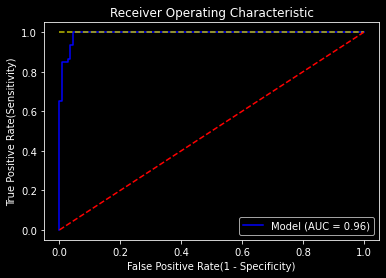

In [25]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label=f'Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [1, 1], 'y--')
plt.plot([0, 1], [0, 1], 'r--')

plt.legend(loc='lower right')
plt.show()

2.6 예측값 병합 및 저장

In [26]:
prob_train = model.predict_proba(X_scaled_minmax_train)

import numpy as np
pred_temp = np.zeros([y_train.shape[0], 1])
pred_temp[:, 0] = pred_train
pred_train = pred_temp

y_train[['y_pred']] = pred_train
y_train[['y_prob0', 'y_prob1']] = prob_train
y_train

,Class,y_pred,y_prob0,y_prob1
131,0,0.0,0.981014,0.018986
6,0,0.0,0.768191,0.231809
0,0,0.0,0.966431,0.033569
269,0,0.0,0.988880,0.011120
56,1,1.0,0.203161,0.796839
...,...,...,...,...
515,1,1.0,0.021270,0.978730
216,1,0.0,0.895961,0.104039
312,1,1.0,0.113440,0.886560
11,0,0.0,0.987405,0.012595


In [27]:
prob_test = model.predict_proba(X_scaled_minmax_test)

pred_temp = np.zeros([y_test.shape[0], 1])
pred_temp[:, 0] = pred_test
pred_test = pred_temp

y_test[['y_pred']] = pred_test[:]
y_test[['y_prob0', 'y_prob1']] = prob_test
y_test

,Class,y_pred,y_prob0,y_prob1
541,0,0.0,0.955893,0.044107
549,0,0.0,0.970887,0.029113
318,0,0.0,0.943572,0.056428
183,0,0.0,0.979370,0.020630
478,1,1.0,0.001305,0.998695
...,...,...,...,...
425,1,1.0,0.006201,0.993799
314,1,1.0,0.067440,0.932560
15,1,1.0,0.436887,0.563113
510,0,0.0,0.983410,0.016590


In [28]:
Total_test = pd.concat([X_test, y_test], axis=1)
Total_test

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,y_pred,y_prob0,y_prob1
541,5,2,2,2,1,1,2,1,1,0,0.0,0.955893,0.044107
549,4,1,1,1,2,1,3,2,1,0,0.0,0.970887,0.029113
318,5,2,2,2,2,1,2,2,1,0,0.0,0.943572,0.056428
183,1,2,3,1,2,1,3,1,1,0,0.0,0.979370,0.020630
478,5,10,10,10,6,10,6,5,2,1,1.0,0.001305,0.998695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,10,4,3,10,4,10,10,1,1,1,1.0,0.006201,0.993799
314,8,10,3,2,6,4,3,10,1,1,1.0,0.067440,0.932560
15,7,4,6,4,6,1,4,3,1,1,1.0,0.436887,0.563113
510,3,1,1,2,2,1,1,1,1,0,0.0,0.983410,0.016590


In [29]:
# Total_test.to_csv('classification_test.csv')